# Boolean circuit

## Preliminary
[哈佛大学CS121课程](https://cs121.boazbarak.org) CS 121 Lecture 4 : Defining computation

The following python packages are needed:

1. graphviz
2. SchemDraw

Also `graphviz` should be installed to the system path.

In [1]:
# utility code 
%run "Utilities.ipynb"
from IPython.display import clear_output
clear_output()

## 举例1 MAJ

In [2]:
def MAJ(a,b,c):
    return NAND(NAND(NAND(NAND(a,b),NAND(a,c)),NAND(NAND(a,b),NAND(a,c))),NAND(b,c))

def MAJ2(a,b,c):
    return OR(AND(a,b), OR(AND(b,c), AND(a,c)))

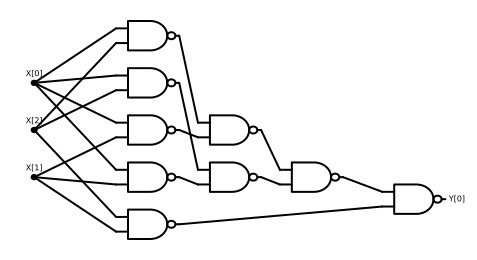

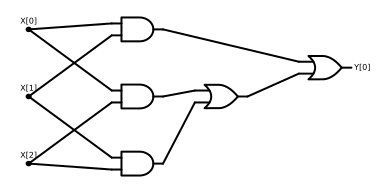

In [3]:
circuit(MAJ).draw()
circuit(MAJ2).draw()

In [4]:
table(MAJ)
table(MAJ2)

_Input_ | _Output_
--------|---------
  $000$  | $0$ 
  $001$  | $0$ 
  $010$  | $0$ 
  $011$  | $1$ 
  $100$  | $0$ 
  $101$  | $1$ 
  $110$  | $1$ 
  $111$  | $1$ 


_Input_ | _Output_
--------|---------
  $000$  | $0$ 
  $001$  | $0$ 
  $010$  | $0$ 
  $011$  | $1$ 
  $100$  | $0$ 
  $101$  | $1$ 
  $110$  | $1$ 
  $111$  | $1$ 


## 举例2 XOR

In [5]:
xorcode = r"""
notx0   = NOT(X[0])
notx1   = NOT(X[1])
t0      = AND(notx0,X[1])
t1      = AND(notx1,X[0])
Y[0]    = OR(t0,t1)
"""[1:]

In [6]:
table(xorcode)

_Input_ | _Output_
--------|---------
  $00$  | $0$ 
  $01$  | $1$ 
  $10$  | $1$ 
  $11$  | $0$ 


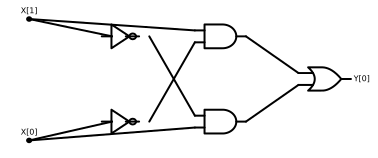

In [7]:
circuit(xorcode)

In [8]:
xorcode2 = AON2NAND(xorcode)

_Input_ | _Output_
--------|---------
  $00$  | $0$ 
  $01$  | $1$ 
  $10$  | $1$ 
  $11$  | $0$ 


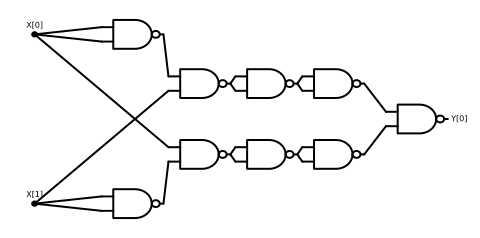

In [9]:
table(xorcode2)
circuit(xorcode2).draw()

In [10]:
xorcode3='''
u = NAND(X[0],X[1])
v = NAND(X[0],u)
w = NAND(X[1],u) 
Y[0] = NAND(v,w)'''[1:]

_Input_ | _Output_
--------|---------
  $00$  | $0$ 
  $01$  | $1$ 
  $10$  | $1$ 
  $11$  | $0$ 


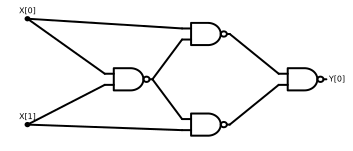

In [11]:
table(xorcode3)
circuit(xorcode3).draw()

## 举例3 CMP

In [12]:
def CMP(x0, x1, x2, x3):
    u = AND(NOT(x2), x0)
    v = OR(x0, x2)
    w = AND(x1, NOT(x3))
    return OR(AND(u,v), w)

In [13]:
table(CMP)

_Input_ | _Output_
--------|---------
  $0000$  | $0$ 
  $0001$  | $0$ 
  $0010$  | $0$ 
  $0011$  | $0$ 
  $0100$  | $1$ 
  $0101$  | $0$ 
  $0110$  | $1$ 
  $0111$  | $0$ 
  $1000$  | $1$ 
  $1001$  | $1$ 
  $1010$  | $0$ 
  $1011$  | $0$ 
  $1100$  | $1$ 
  $1101$  | $1$ 
  $1110$  | $1$ 
  $1111$  | $0$ 


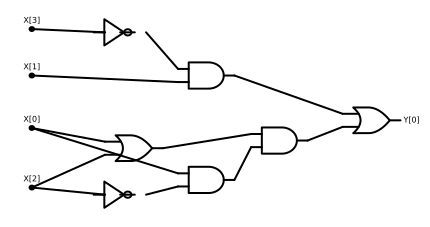

In [14]:
C = circuit(CMP)
C.draw()

1

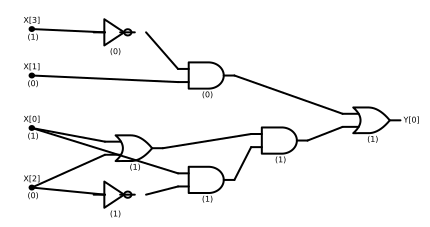

In [15]:
C(1,0,0,1, render=True)

## 举例4 ALLEQ

In [16]:
def ALLEQ(a, b, c, d):
    u = XOR(a, b)
    v = XOR(c, d)
    w = XOR(b, c)
    return NOT(OR(u, OR(v, w)))

In [17]:
table(ALLEQ)

_Input_ | _Output_
--------|---------
  $0000$  | $1$ 
  $0001$  | $0$ 
  $0010$  | $0$ 
  $0011$  | $0$ 
  $0100$  | $0$ 
  $0101$  | $0$ 
  $0110$  | $0$ 
  $0111$  | $0$ 
  $1000$  | $0$ 
  $1001$  | $0$ 
  $1010$  | $0$ 
  $1011$  | $0$ 
  $1100$  | $0$ 
  $1101$  | $0$ 
  $1110$  | $0$ 
  $1111$  | $1$ 


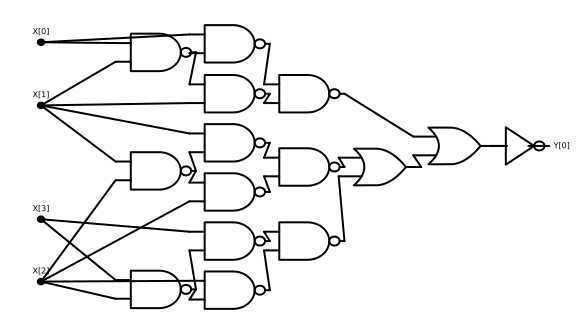

In [18]:
circuit(ALLEQ)

## Questions
1. 请用不同的电路结构，实现ALLEQ函数。
2. 请实现5个输入的ALLEQ函数。
3. 实现选择器 $f:\{0,1\}^3 \rightarrow \{0,1\}$ s.t.
$$f(a,b,c) = \begin{cases}b & a=1 \\ c & a =0 \end{cases}$$


In [23]:
def ALLEQ5(a, b, c, d, e):
    r1 = AND(AND(AND(a,b),AND(c,d)), e)
    r2 = NOT(OR(OR(OR(a,b),OR(c,d)),e))
    return OR(r1, r2)

In [24]:
table(ALLEQ5)

_Input_ | _Output_
--------|---------
  $00000$  | $1$ 
  $00001$  | $0$ 
  $00010$  | $0$ 
  $00011$  | $0$ 
  $00100$  | $0$ 
  $00101$  | $0$ 
  $00110$  | $0$ 
  $00111$  | $0$ 
  $01000$  | $0$ 
  $01001$  | $0$ 
  $01010$  | $0$ 
  $01011$  | $0$ 
  $01100$  | $0$ 
  $01101$  | $0$ 
  $01110$  | $0$ 
  $01111$  | $0$ 
  $10000$  | $0$ 
  $10001$  | $0$ 
  $10010$  | $0$ 
  $10011$  | $0$ 
  $10100$  | $0$ 
  $10101$  | $0$ 
  $10110$  | $0$ 
  $10111$  | $0$ 
  $11000$  | $0$ 
  $11001$  | $0$ 
  $11010$  | $0$ 
  $11011$  | $0$ 
  $11100$  | $0$ 
  $11101$  | $0$ 
  $11110$  | $0$ 
  $11111$  | $1$ 


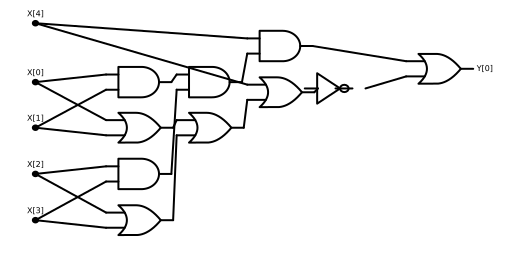

In [25]:
circuit(ALLEQ5)